In [1]:
import sys
sys.path.insert(1, "D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/mathematics")
import model

In [2]:
import simulaciones
import matplotlib.pyplot as plt

C:\Users\Edgar Trejo\anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
modelobase = model.SEIRDmodel().simular()[[5*i + 2 for i in range(8)]].

In [9]:
modelosred = []

In [10]:
for r in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    modelosred.append(model.SEIRDmodel(r = r).simular()[[5*i + 2 for i in range(8)]])

checamos los cambios a partir del día 25 babas pues

In [15]:
import numpy as np

In [16]:
np.mean((modelobase[:, 25:] - modelosred[0][:, 25:])/modelobase[:, 25:], axis = 1)

array([-0.86896234, -0.76456357, -1.79397067, -0.84597086, -1.26577035,
       -2.83751012, -0.13002866, -1.7081884 ])

In [19]:
medias = np.zeros((9,8), dtype = np.float64)

In [20]:
for i in range(9):
    medias[i] = np.mean((modelobase[:, 25:] - modelosred[i][:, 25:])/modelobase[:, 25:], axis = 1)

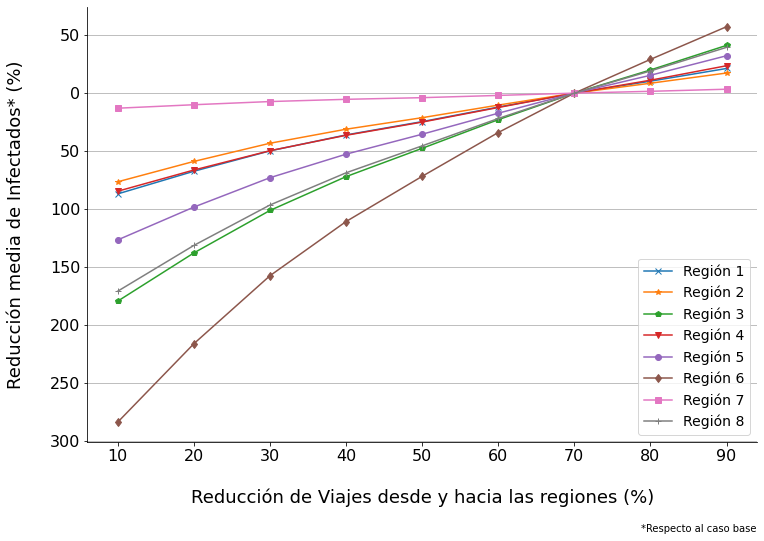

In [37]:
fig, ax = plt.subplots()

markers = ['x', '*', 'p', 'v', 'o', 'd', 's', '+']

for i in range(8):
    ax.plot(medias[:,i], label = 'Región {}'.format(i+1), marker = markers[i])

    
ax.set_ylabel('Reducción media de Infectados* (%)\n', fontsize = 18)
ax.set_xlabel('\nReducción de Viajes desde y hacia las regiones (%)', fontsize = 18)
ax.spines[['right', 'top']].set_visible(False)

ax.annotate('*Respecto al caso base',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
ax.set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90], fontsize = 16)

ax.set_yticks([-3, -2.5, -2, -1.5, -1, -.5, 0, .5])
ax.set_yticklabels([300, 250, 200, 150, 100, 50, 0, 50], fontsize = 16)
fig.set_size_inches(12, 8)
plt.legend(prop={'size':14})
plt.grid(axis = 'y')

plt.show()

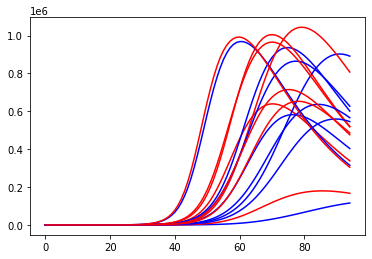

In [7]:
fig, ax = plt.subplots()

for i in range(8):
    ax.plot(modelosred[0][i], color = 'b')
    ax.plot(modelobase[i], color = 'r')

plt.show()

In [28]:
import numpy as np

np.mean(1 - modelo1/modelobase, axis = 1)

C:\Users\Edgar Trejo\AppData\Local\Temp\ipykernel_13576\415525929.py:3: RuntimeWarning: invalid value encountered in true_divide
  np.mean(1 - modelo1/modelobase, axis = 1)


array([       nan, 0.08069925,        nan,        nan,        nan,
              nan, 0.03043087, 0.12283577])

In [30]:
df = simulaciones.simularReduccionTrafico()

25 0.1
25 0.2
25 0.3
25 0.4
25 0.5
25 0.6
25 0.7
25 0.8
25 0.9


In [31]:
df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.034842,0.068336,0.099007,0.122158,0.141851,0.167620,0.196430,0.225430,0.265089
1,0.031875,0.062253,0.089749,0.110337,0.127530,0.149613,0.173649,0.196244,0.224717
2,0.053287,0.103516,0.149967,0.187702,0.221791,0.264353,0.313018,0.367200,0.443994
3,0.034026,0.067165,0.098092,0.122103,0.143036,0.170420,0.201385,0.233886,0.280996
4,0.044365,0.086679,0.125929,0.157421,0.185294,0.220581,0.260583,0.304060,0.367247
5,0.067802,0.131722,0.191262,0.241526,0.288467,0.344980,0.407905,0.474030,0.550659
6,0.012470,0.024440,0.035616,0.043330,0.048950,0.057218,0.066071,0.073084,0.081571
7,0.047050,0.091340,0.132270,0.165543,0.195652,0.233528,0.277216,0.326496,0.397286


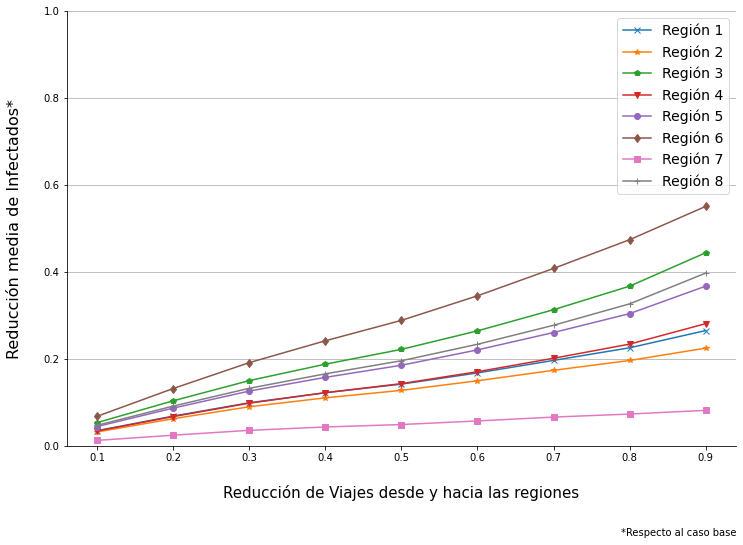

In [32]:
red = df.columns.to_numpy(dtype = float)

markers = ['x', '*', 'p', 'v', 'o', 'd', 's', '+']

fig, ax = plt.subplots()
for i in range(8):
    ax.plot(red, df.iloc[i], label = 'Región {}'.format(i+1), marker = markers[i])
    
ax.set_ylabel('Reducción media de Infectados*\n', fontsize = 16)
ax.set_xlabel('\nReducción de Viajes desde y hacia las regiones', fontsize = 15)
ax.spines[['right', 'top']].set_visible(False)

ax.annotate('*Respecto al caso base',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

fig.set_size_inches(12, 8)
plt.legend(prop={'size':14})
plt.grid(axis = 'y')
plt.ylim(0, 1)
plt.show()

In [40]:
modelosred2 = []
for r in [0, 6, 13, 20, 27, 34, 41, 48, 55, 62, 69, 76, 83, 90]:
    modelosred2.append(model.SEIRDmodel(inicio_red = r).simular()[[5*i + 2 for i in range(8)]])

In [69]:
medias = np.zeros((14,8), dtype = np.float64)
for i in range(14):
    medias[i] = np.mean((modelobase[:, 25:] - modelosred2[i][:, 25:])/modelobase[:, 25:], axis = 1)

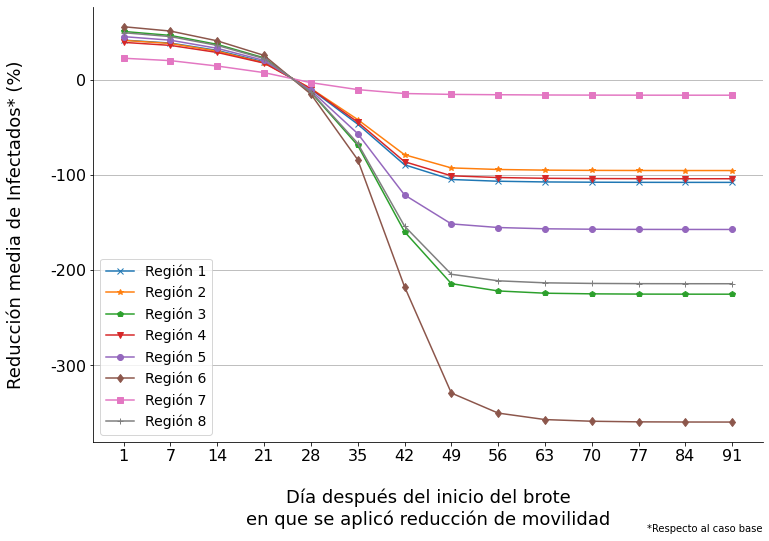

In [73]:
fig, ax = plt.subplots()

markers = ['x', '*', 'p', 'v', 'o', 'd', 's', '+']

for i in range(8):
    ax.plot(medias[:,i], label = 'Región {}'.format(i+1), marker = markers[i])

    
ax.set_ylabel('Reducción media de Infectados* (%)\n', fontsize = 18)
ax.set_xlabel('\nDía después del inicio del brote\nen que se aplicó reducción de movilidad', fontsize = 18)
ax.spines[['right', 'top']].set_visible(False)

ax.annotate('*Respecto al caso base',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax.set_xticklabels(np.array([0, 6, 13, 20, 27, 34, 41, 48, 55, 62, 69, 76, 83, 90])+1, fontsize = 16)

ax.set_yticks([-3, -2, -1, 0])
ax.set_yticklabels([-300, -200, -100, 0], fontsize = 16)

fig.set_size_inches(12, 8)
plt.legend(prop={'size':14})
plt.grid(axis = 'y')

plt.show()

In [85]:
modelosred3 = []

for f in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    modelosred3.append(model.SEIRDmodel(propInfAislamientoTotal = f).simular()[[5*i + 2 for i in range(8)]])

In [90]:
medias = np.zeros((10,8), dtype = np.float64)
for i in range(10):
    medias[i] = np.mean((modelobase[:, 25:] - modelosred3[i][:, 25:])/modelobase[:, 25:], axis = 1)

In [91]:
medias

array([[-2.69123380e+01, -2.70463086e+01, -3.87773953e+01,
        -2.55339190e+01, -3.27864824e+01, -4.40737875e+01,
        -1.42580042e+01, -3.65310908e+01],
       [-1.97101585e+01, -1.99435369e+01, -2.74089384e+01,
        -1.86588080e+01, -2.34465575e+01, -3.06963048e+01,
        -1.09354315e+01, -2.60713598e+01],
       [-1.48497717e+01, -1.49941084e+01, -2.02994266e+01,
        -1.40743479e+01, -1.74639237e+01, -2.26632887e+01,
        -8.29334324e+00, -1.94110352e+01],
       [-1.03573867e+01, -1.04832730e+01, -1.37964011e+01,
        -9.81691647e+00, -1.19756737e+01, -1.53038808e+01,
        -5.95256074e+00, -1.32809565e+01],
       [-6.40969187e+00, -6.55040725e+00, -8.25443463e+00,
        -6.07488650e+00, -7.25467556e+00, -9.08400850e+00,
        -3.93025746e+00, -8.01002692e+00],
       [-3.98310760e+00, -4.06106429e+00, -5.05285205e+00,
        -3.78836650e+00, -4.46973907e+00, -5.56707766e+00,
        -2.47666518e+00, -4.92035149e+00],
       [-2.22006686e+00, -2.249728

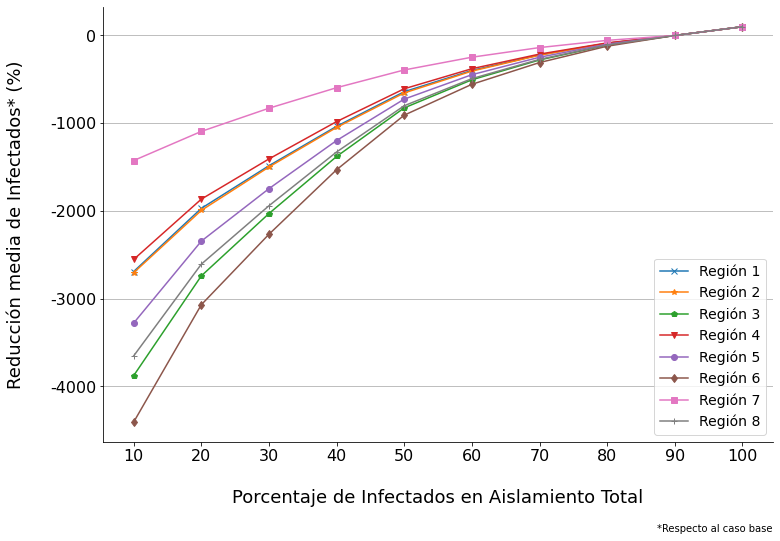

In [92]:
fig, ax = plt.subplots()

markers = ['x', '*', 'p', 'v', 'o', 'd', 's', '+']

for i in range(8):
    ax.plot(medias[:,i], label = 'Región {}'.format(i+1), marker = markers[i])

    
ax.set_ylabel('Reducción media de Infectados* (%)\n', fontsize = 18)
ax.set_xlabel('\nPorcentaje de Infectados en Aislamiento Total', fontsize = 18)
ax.spines[['right', 'top']].set_visible(False)

ax.annotate('*Respecto al caso base',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)

ax.set_yticks([-40, -30, -20, -10, 0])
ax.set_yticklabels([-4000, -3000, -2000, -1000, 0], fontsize = 16)


fig.set_size_inches(12, 8)
plt.legend(prop={'size':14})
plt.grid(axis = 'y')

plt.show()